In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date, datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math

sns.set()
%matplotlib inline

### Пути к CSV файлом с данными от S&P 500 и S&P 500 VIX

In [37]:
path_csv_us500 = "../csv_date/ES=F.csv"
path_csv_us500vix = '../csv_date/VX_US500.csv'

df_us500 = pd.read_csv(path_csv_us500, parse_dates=True, index_col=0)
df_us500vix = pd.read_csv(path_csv_us500vix, parse_dates=True, index_col=0)

In [38]:
df_us500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,3261.75,3234.25,3237.00,3259.00,1416241.0,3259.00
2020-01-03,3263.50,3206.75,3261.00,3235.50,1755057.0,3235.50
2020-01-06,3249.50,3208.75,3220.25,3243.50,1502748.0,3243.50
2020-01-07,3254.50,3226.00,3243.50,3235.25,1293494.0,3235.25
2020-01-08,3267.75,3181.00,3231.75,3260.25,2279138.0,3260.25


In [39]:
df_us500vix.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2020-01-01,14.62,14.68,14.47,14.53,0,-0.65
2020-01-02,14.75,14.78,14.05,14.07,81931,-3.13
2020-01-03,14.10,16.15,14.07,15.02,131250,6.75
2020-01-06,15.60,16.15,14.73,14.88,84246,-1.00
2020-01-07,15.00,15.16,14.50,14.68,74725,-1.34


### Значений raw в акциях S&P 500 больше чем raw значений в индексе

In [40]:
print(df_us500.shape, df_us500vix.shape)

(421, 6) (442, 6)


### реиндексируем S&P 500 VIX

In [41]:
date_index = df_us500.index
df_us500vix = df_us500vix.reindex(date_index)
df_us500.shape

(421, 6)

In [42]:
df_us500["average_value"] = (df_us500["High"] + df_us500["Low"]) / 2
df_us500vix["average_value"] = (df_us500vix["High"] + df_us500vix["Low"]) / 2

## Рисуем график S&P 500

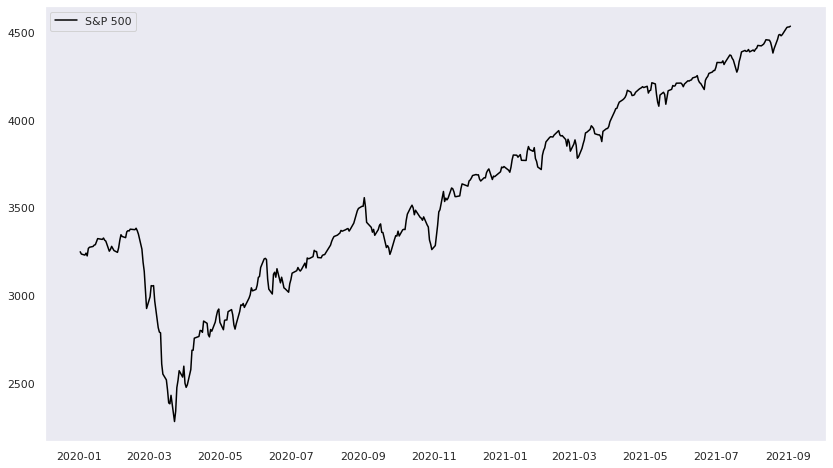

In [45]:
Xaxis = df_us500.index
Yaxis = df_us500["average_value"].values

plt.figure(figsize=(14, 8))
plt.plot(Xaxis, Yaxis, 'black', label='S&P 500')
plt.legend()
plt.grid()

## Рисуем график S&P 500 VIX

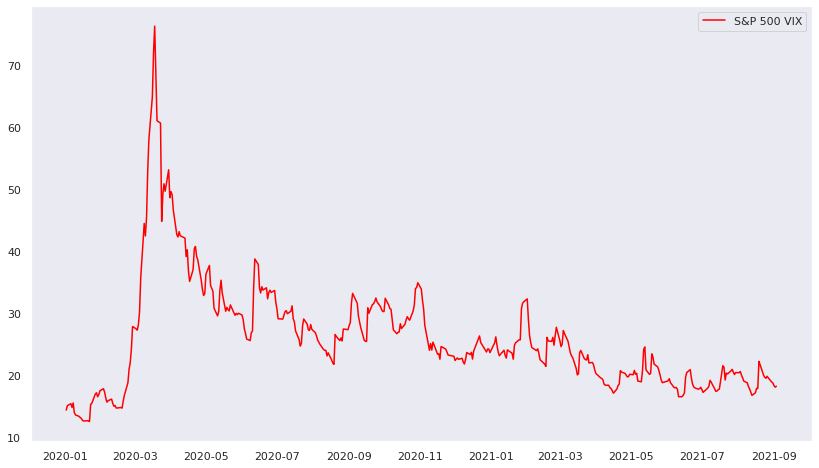

In [17]:
Xaxis = df_us500vix.index
Yaxis = df_us500vix["average_value"].values

plt.figure(figsize=(14, 8))
plt.plot(Xaxis, Yaxis, 'red', label='S&P 500 VIX')
plt.legend()
plt.grid()

## Нормализуем данные

In [26]:
def normalizeValues(data, newColumn, exisatingColum):
    val = data.iloc[-1][exisatingColum]
    data[newColumn] = data.apply(lambda row: (row[exisatingColum] / val), axis=1)
    return data

In [34]:
df_us500 = normalizeValues(df_us500, 'normal', 'average_value')
df_us500['normal'] = df_us500['normal'] * 3
df_us500.head()

,High,Low,Open,Close,Volume,Adj Close,average_value,normal
Date,,,,,,,,
2020-01-02,3261.75,3234.25,3237.00,3259.00,1416241.0,3259.00,3248.000,2.148918
2020-01-03,3263.50,3206.75,3261.00,3235.50,1755057.0,3235.50,3235.125,2.140400
2020-01-06,3249.50,3208.75,3220.25,3243.50,1502748.0,3243.50,3229.125,2.136430
2020-01-07,3254.50,3226.00,3243.50,3235.25,1293494.0,3235.25,3240.250,2.143790
2020-01-08,3267.75,3181.00,3231.75,3260.25,2279138.0,3260.25,3224.375,2.133287


In [32]:
df_us500vix = normalizeValues(df_us500vix, 'normal', 'average_value')
df_us500vix.head()

,Open,High,Low,Close,Volume,Change Pct,average_value,normal
Date,,,,,,,,
2020-01-02,14.75,14.78,14.05,14.07,81931,-3.13,14.415,0.789863
2020-01-03,14.10,16.15,14.07,15.02,131250,6.75,15.110,0.827945
2020-01-06,15.60,16.15,14.73,14.88,84246,-1.00,15.440,0.846027
2020-01-07,15.00,15.16,14.50,14.68,74725,-1.34,14.830,0.812603
2020-01-08,15.00,17.27,13.85,14.18,150316,-3.41,15.560,0.852603


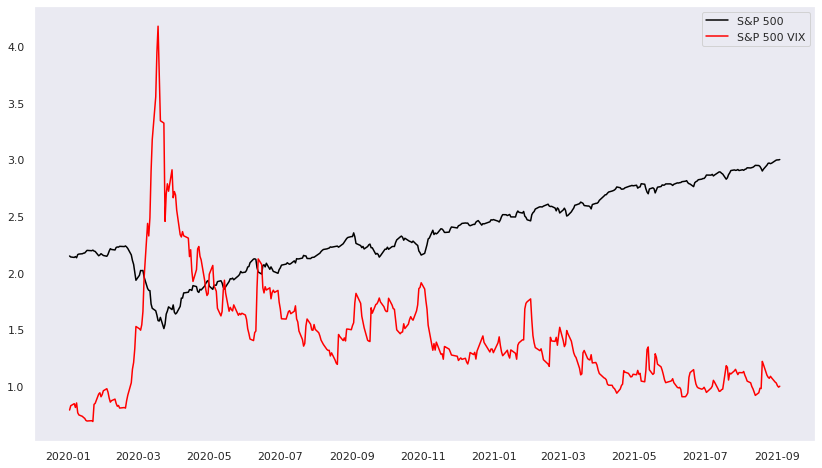

In [35]:
Xaxis = df_us500.index
Yaxis = df_us500["normal"].values

plt.figure(figsize=(14, 8))
plt.plot(Xaxis, Yaxis, 'black', label='S&P 500')

Yaxis = df_us500vix["normal"].values
plt.plot(Xaxis, Yaxis, 'red', label='S&P 500 VIX')

plt.legend()
plt.grid()